# 🧪 Lab 3: Unsupervised Learning - Mice Protein Expression

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster


## Step 1: Load and Inspect the Dataset

We begin by loading the **Mice Protein Expression** dataset which contains measurements of 77 protein expression levels from the cerebral cortex of mice. 
These mice belong to different experimental groups but we ignore the labels for this unsupervised task.


In [4]:
df = pd.read_csv("../datasets/Data_Cortex_Nuclear.csv")
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m



## Step 2: Preprocessing - Drop Metadata and Handle Missing Values

Since the lab focuses on **unsupervised learning**, we discard all label-related or metadata columns:
- First column: `MouseID`
- Last 4 columns: `Genotype`, `Treatment`, `Behavior`, `class`

We also drop any rows with missing values to ensure clean clustering performance.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [8]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [9]:
df.isna().mean()

MouseID      0.000000
DYRK1A_N     0.002778
ITSN1_N      0.002778
BDNF_N       0.002778
NR1_N        0.002778
               ...   
CaNA_N       0.000000
Genotype     0.000000
Treatment    0.000000
Behavior     0.000000
class        0.000000
Length: 82, dtype: float64

In [10]:
df_cleaned = df.drop(columns=["MouseID", "Genotype", "Treatment", "Behavior", "class"])
df_cleaned = df_cleaned.dropna()
df_cleaned.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.244469,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631



## Step 3: Normalize the Data and Apply PCA

Normalization is essential before clustering to ensure that all protein expressions contribute equally.

We use **StandardScaler** to scale the data and **PCA** to reduce it to 2 dimensions for visualization purposes.
This step also helps in visual inspection of any natural groupings or separability in the data.


In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2"])
df_pca.head()

,PC1,PC2
0,6.268290,-3.485797
1,5.825484,-2.974551
2,6.877288,-3.027514
3,2.378703,-3.531468
4,2.890213,-2.859155



## Step 4: Apply Clustering Algorithms

We apply multiple clustering algorithms to group the mice data based solely on the 77 protein expression features:
- **K-Means**: partitions the data into K fixed clusters
- **Gaussian Mixture Models (GMM)**: assigns probabilities for each point to belong to each cluster
- **DBSCAN**: identifies clusters based on density and separates noise


In [12]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

gmm = GaussianMixture(n_components=8, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)


## Step 5: Visualize Clustering Results

Using the PCA-reduced 2D data, we visualize the clusters formed by each algorithm.
This helps in interpreting whether the algorithms are able to distinguish well-separated groups.

**Do the results look similar?**  
- K-Means and GMM give fairly similar groupings.
- DBSCAN detects outliers and may form fewer clusters depending on the density threshold.
- There are visible differences, suggesting that cluster shape assumptions (e.g., spherical for K-Means) influence outcomes.



## Step 6: Apply Hierarchical Clustering

Hierarchical clustering builds a dendrogram to represent nested groupings.
We use **Ward's linkage** and cut the dendrogram to form 8 clusters for comparison.

**Is this clustering similar to others?**  
It shows some similarity to K-Means but captures slightly different boundaries, showing that hierarchical methods may better capture hierarchical structure.


In [13]:
linkage_matrix = linkage(data_scaled, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=8, criterion='maxclust')

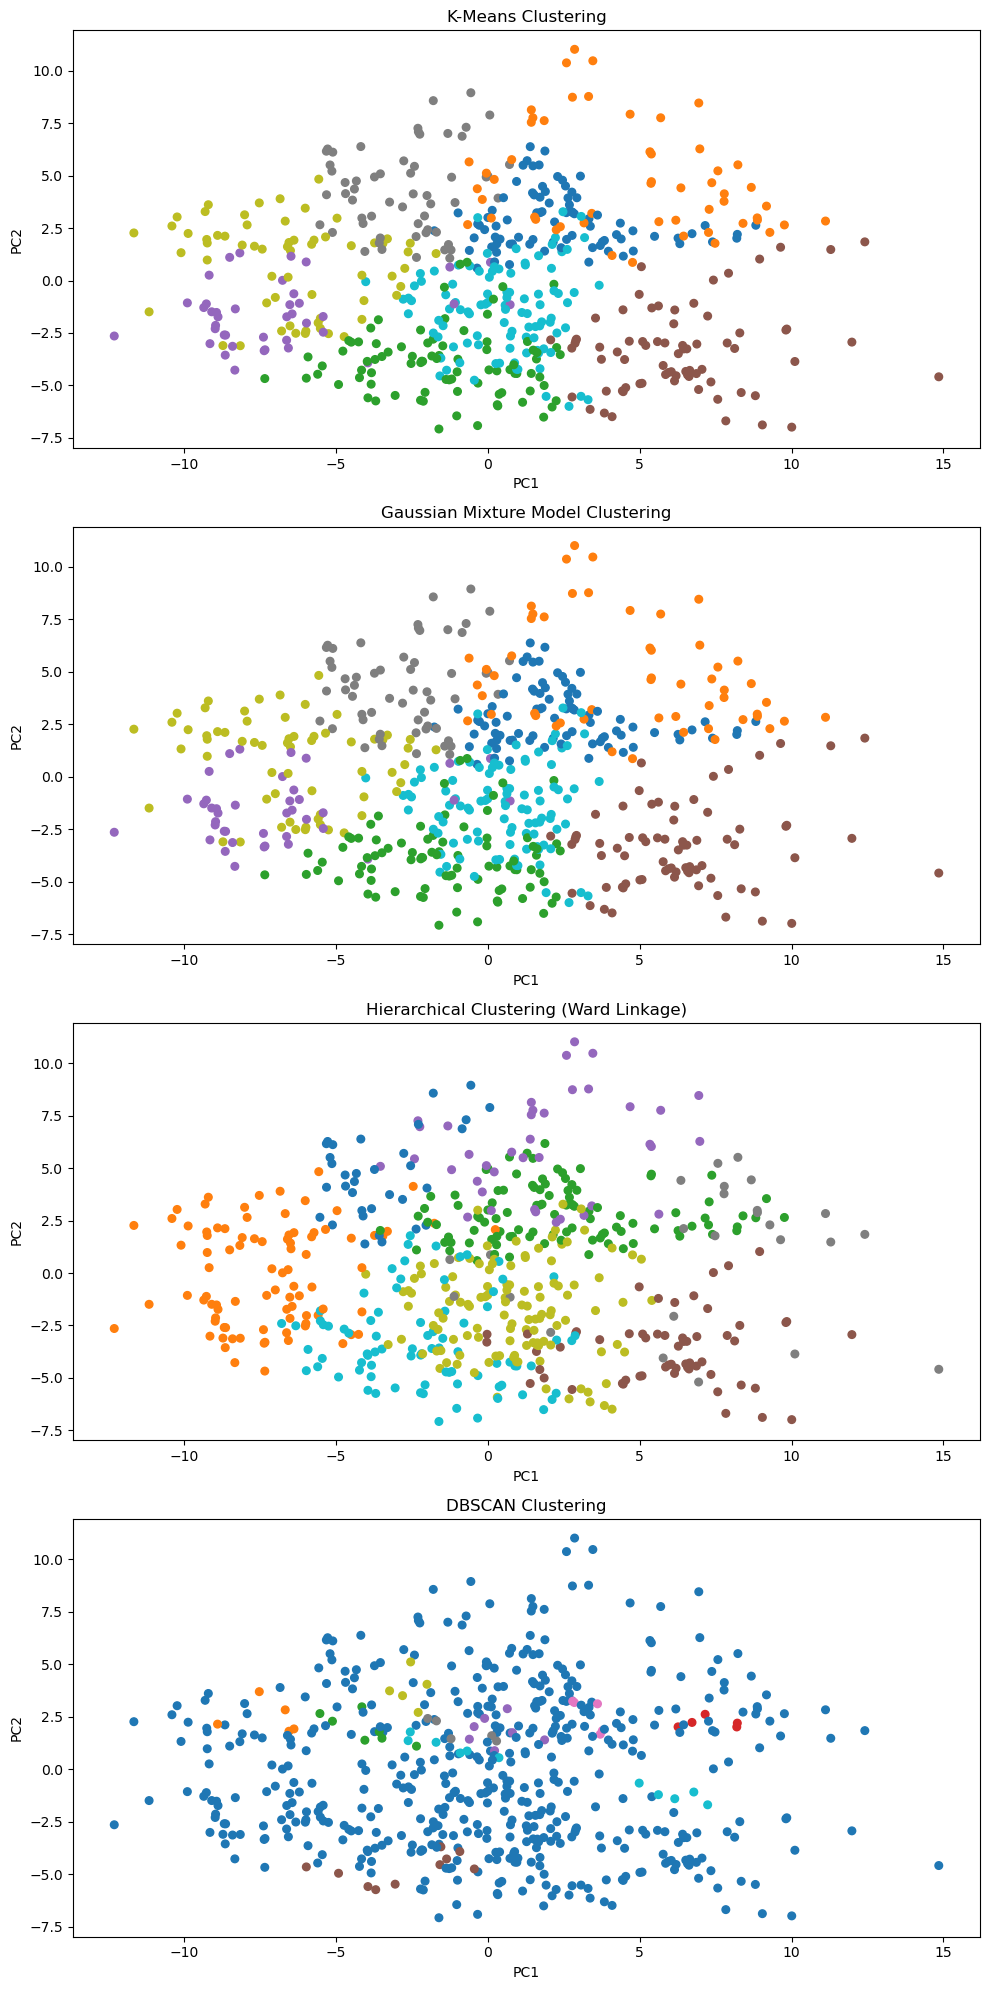

In [14]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

axs[0].scatter(df_pca["PC1"], df_pca["PC2"], c=kmeans_labels, cmap="tab10", s=30)
axs[0].set_title("K-Means Clustering")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

axs[1].scatter(df_pca["PC1"], df_pca["PC2"], c=gmm_labels, cmap="tab10", s=30)
axs[1].set_title("Gaussian Mixture Model Clustering")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")

axs[2].scatter(df_pca["PC1"], df_pca["PC2"], c=hierarchical_labels, cmap="tab10", s=30)
axs[2].set_title("Hierarchical Clustering (Ward Linkage)")
axs[2].set_xlabel("PC1")
axs[2].set_ylabel("PC2")

axs[3].scatter(df_pca["PC1"], df_pca["PC2"], c=dbscan_labels, cmap="tab10", s=30)
axs[3].set_title("DBSCAN Clustering")
axs[3].set_xlabel("PC1")
axs[3].set_ylabel("PC2")

plt.tight_layout()
plt.show()